In [1]:
import sys
import seaborn as sns
sys.path.append("..")
%matplotlib inline
sns.set(rc={'image.cmap': 'Purples_r'})

#Experiment Database

In [2]:
import lib.ngdb as ngdb
import lib.ngsimu as ngsimu

Using *ngdb* instead of *ngsimu*, we create Experiments objects that are re-usable via a database. Execute the code below, and a second time for the graph().show() part, you will notice the difference between the 2 libs (testexp is ngdb.Experiment, testexp2 is ngsimu.Experiment).

In [3]:
xp_cfg={
    'pop_cfg':{
        'voc_cfg':{
            'voc_type':'sparse_matrix',
            'M':5,
            'W':10
            },
        'strat_cfg':{
            'strat_type':'naive'
            },
        'nbagent':10
        },
    'step':10
}

testexp=ngdb.Experiment(**xp_cfg)
testexp
testexp2=ngsimu.Experiment(**xp_cfg)
testexp2

In [4]:
testexp.continue_exp_until(100)
testexp2.continue_exp_until(100)

AttributeError: 'Experiment' object has no attribute '_voctype'

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


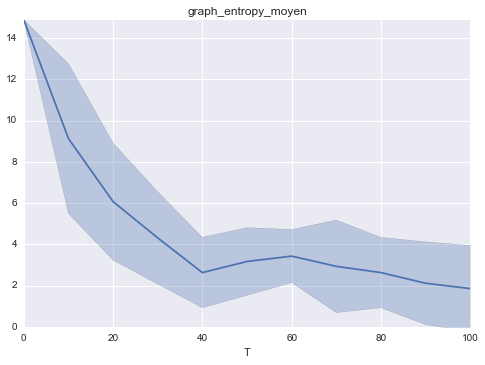

In [5]:
testexp.graph("entropy").show()


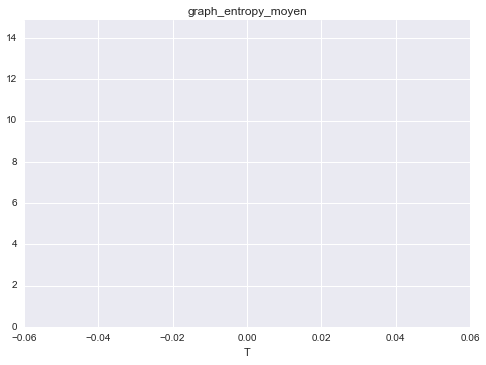

In [6]:
testexp2.graph("entropy").show()

##Get back existing experiments, merge DBs, and plot with different abscisse

In [4]:
db=ngdb.NamingGamesDB("ng2.db")

In [5]:
testexp3=db.get_experiment(**xp_cfg)

In [6]:
testexp3.continue_exp_until(200)

In [7]:
db.merge("naminggames.db",remove=False)

In [13]:
testexp3=db.get_experiment(M=7,strat=strat,W=8,voctype=voctype,nbagent=12,step=T_step,force_new=True)

In [14]:
testexp3.continue_exp_until(100)

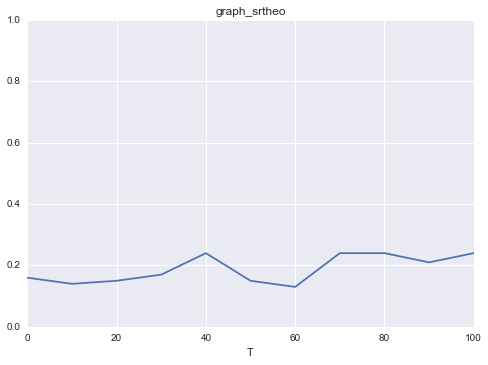

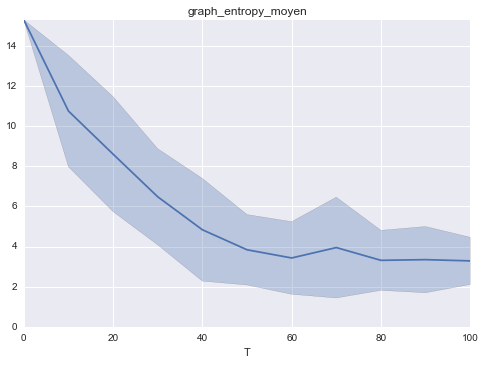

In [15]:
testexp3.graph("srtheo").show()
testexp3.graph("entropy").show()

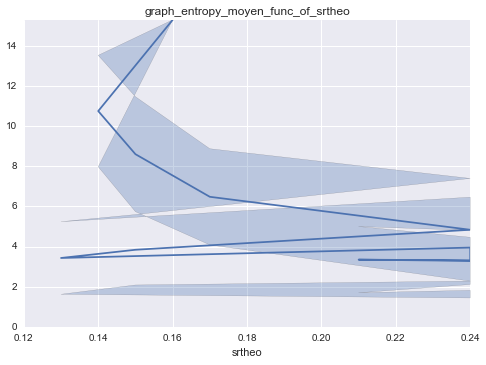

In [16]:
testexp3.graph("entropy",X="srtheo").show()

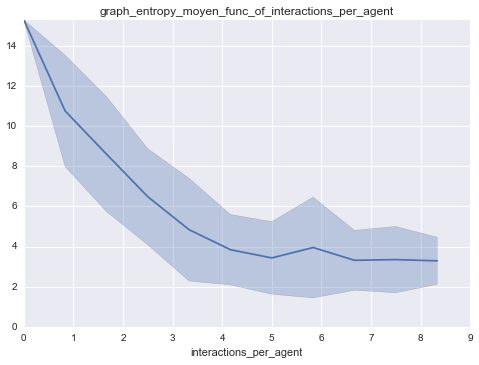

In [17]:
testexp3.graph("entropy",X="interactions_per_agent").show()